In [ ]:
import sklearn
print(sklearn.__version__)
import torch
print(torch.__version__)
import argparse
print(argparse.__version__)
import numpy
print(numpy.__version__)
import cv2
print(cv2.__version__)
import torchvision
print(torchvision.__version__)

0.22.2.post1
1.7.0+cu101
1.1
1.19.4
4.1.2
0.8.1+cu101


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#Copying the supporting unte.py to the colab notebook runtime.
!cp '/gdrive/My Drive/software/Unet_Pytorch/experiment_scripts/unet.py' unet.py
import sys
sys.path.append('/content')
from unet import UNet

In [ ]:
#v2
#7/11/2018

import argparse
import os
import glob
import numpy as np
import cv2
import torch
import sklearn.feature_extraction.image
import matplotlib.pyplot as plt
from unet import UNet

import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [ ]:
#-----helper function to split data into batches
def divide_batch(l, n): 
    for i in range(0, l.shape[0], n):  
        yield l[i:i + n,::]

In [ ]:
# Parameters

base_dir = '/gdrive/My Drive/software/Unet_Pytorch/Data/'
dataname='sardines'
experiment = 'experiment_final2'
imatges_output= 'sardina_test'

In [ ]:
%cd /gdrive/My\ Drive/software/Unet_Pytorch/Data/sardines/experiment_final2

/gdrive/My Drive/software/Unet_Pytorch/Data/sardines/experiment_final2


In [ ]:

#@title Default title text
# ----- parse command line arguments
parser = argparse.ArgumentParser(description='Make output for entire image using Unet')
parser.add_argument('input_pattern',
                    help="input filename pattern. try: *.jpg, or tsv file containing list of files to analyze",
                    nargs="*")

parser.add_argument('-p', '--patchsize', help="patchsize, default 512", default=512, type=int)
parser.add_argument('-s', '--batchsize', help="batchsize for controlling GPU memory usage, default 10", default=10, type=int)
parser.add_argument('-o', '--outdir', help="outputdir, default ./output/", default="./output/", type=str)
parser.add_argument('-r', '--resize', help="resample image size to this value. default (512,512)", default= (512,512), type=tuple)
parser.add_argument('-m', '--model', help="model", default="best_model.pth", type=str)
parser.add_argument('-i', '--gpuid', help="id of gpu to use", default=0, type=int)
parser.add_argument('-f', '--force', help="force regeneration of output even if it exists", default=False,
                    action="store_true")
parser.add_argument('-b', '--basepath',
                    help="base path to add to file names, helps when producing data using tsv file as input",
                    default="", type=str)

# args = parser.parse_args()
args = parser.parse_args(["*.jpg","-o//"+ base_dir +'/'+dataname+'/'+experiment+ '/output',
                          "-m//"+ base_dir +'/'+dataname+'/'+experiment+ '/'+dataname+'_unet_best_model.pth',
                          "-b/"+ base_dir +'/'+dataname+'/'+imatges_output] )

if not (args.input_pattern):
    parser.error('No images selected with input pattern')

OUTPUT_DIR = args.outdir
resize = args.resize

batch_size = args.batchsize
patch_size = args.patchsize
stride_size = patch_size//2

In [ ]:
# Debugging parameters
resize = (512,512)
batch_size = 1
patch_size = 512
stride_size = 1
processor = -1

tensor2pil = transforms.ToPILImage()

In [ ]:
# ----- load network
device = torch.device(args.gpuid if torch.cuda.is_available() else 'cpu')

In [ ]:
checkpoint = torch.load(args.model, map_location=lambda storage, loc: storage) 
#load checkpoint to CPU and then put to device https://discuss.pytorch.org/t/saving-and-loading-torch-models-on-2-machines-with-different-number-of-gpu-devices/6666

In [ ]:
model = UNet(n_classes=checkpoint["n_classes"], in_channels=checkpoint["in_channels"],
             padding=checkpoint["padding"], depth=checkpoint["depth"], wf=checkpoint["wf"],
             up_mode=checkpoint["up_mode"], batch_norm=checkpoint["batch_norm"]).to(device)
model.load_state_dict(checkpoint["model_dict"])
model.eval()

print(f"total params: \t{sum([np.prod(p.size()) for p in model.parameters()])}")

total params: 	31043586


In [ ]:
# ----- get file list

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

files = []
basepath = args.basepath  #
basepath = basepath + os.sep if len(
    basepath) > 0 else ""  # if the user supplied a different basepath, make sure it ends with an os.sep

if len(args.input_pattern) > 1:  # bash has sent us a list of files
    files = args.input_pattern
elif args.input_pattern[0].endswith("tsv"):  # user sent us an input file
    # load first column here and store into files
    with open(args.input_pattern[0], 'r') as f:
        for line in f:
            if line[0] == "#":
                continue
            files.append(basepath + line.strip().split("\t")[0])
else:  # user sent us a wildcard, need to use glob to find files
    files = glob.glob(args.basepath +"/"+ args.input_pattern[0])

In [ ]:
from skimage import color

working on file: 	 //gdrive/My Drive/software/Unet_Pytorch/Data//sardines/sardina_test/IMG_3408.jpg
saving to : 	 ///gdrive/My Drive/software/Unet_Pytorch/Data//sardines/experiment_final2/output/IMG_3408_shape2.png


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function extract_patches is deprecated; The function feature_extraction.image.extract_patches has been deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(msg, category=FutureWarning)


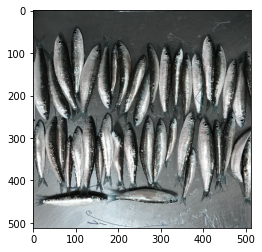

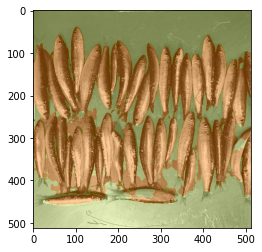

working on file: 	 //gdrive/My Drive/software/Unet_Pytorch/Data//sardines/sardina_test/IMG_3394.jpg
saving to : 	 ///gdrive/My Drive/software/Unet_Pytorch/Data//sardines/experiment_final2/output/IMG_3394_shape2.png


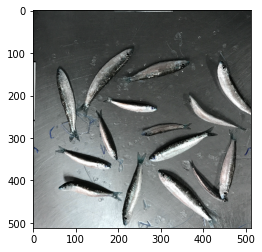

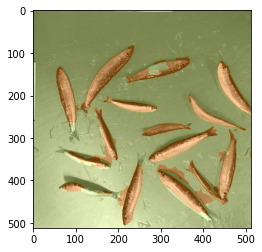

working on file: 	 //gdrive/My Drive/software/Unet_Pytorch/Data//sardines/sardina_test/IMG_3493.jpg
saving to : 	 ///gdrive/My Drive/software/Unet_Pytorch/Data//sardines/experiment_final2/output/IMG_3493_shape2.png


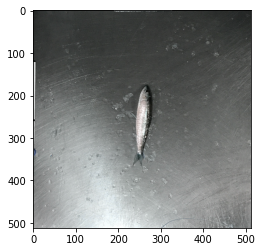

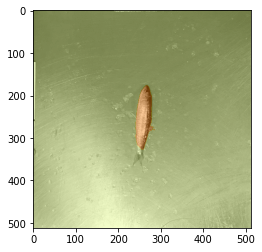

working on file: 	 //gdrive/My Drive/software/Unet_Pytorch/Data//sardines/sardina_test/IMG_3491.jpg
saving to : 	 ///gdrive/My Drive/software/Unet_Pytorch/Data//sardines/experiment_final2/output/IMG_3491_shape2.png


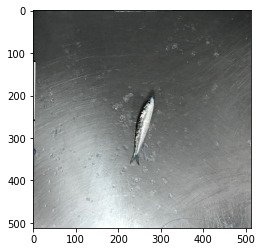

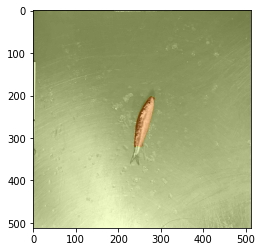

working on file: 	 //gdrive/My Drive/software/Unet_Pytorch/Data//sardines/sardina_test/IMG_3488.jpg
saving to : 	 ///gdrive/My Drive/software/Unet_Pytorch/Data//sardines/experiment_final2/output/IMG_3488_shape2.png


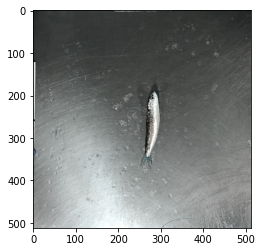

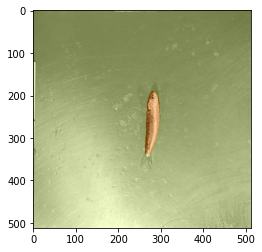

working on file: 	 //gdrive/My Drive/software/Unet_Pytorch/Data//sardines/sardina_test/IMG_3490.jpg
saving to : 	 ///gdrive/My Drive/software/Unet_Pytorch/Data//sardines/experiment_final2/output/IMG_3490_shape2.png


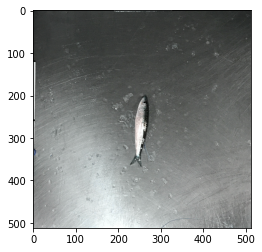

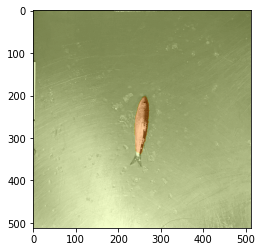

working on file: 	 //gdrive/My Drive/software/Unet_Pytorch/Data//sardines/sardina_test/IMG_3492.jpg
saving to : 	 ///gdrive/My Drive/software/Unet_Pytorch/Data//sardines/experiment_final2/output/IMG_3492_shape2.png


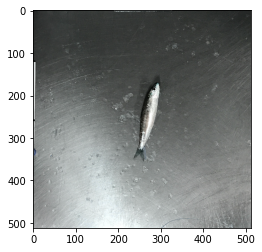

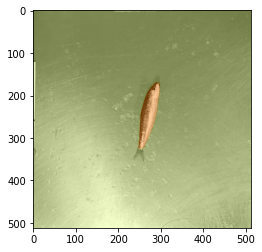

working on file: 	 //gdrive/My Drive/software/Unet_Pytorch/Data//sardines/sardina_test/IMG_3495.jpg
saving to : 	 ///gdrive/My Drive/software/Unet_Pytorch/Data//sardines/experiment_final2/output/IMG_3495_shape2.png


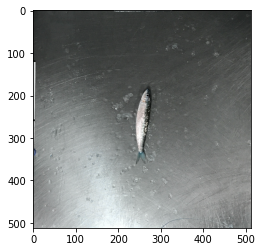

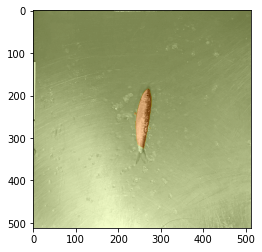

working on file: 	 //gdrive/My Drive/software/Unet_Pytorch/Data//sardines/sardina_test/IMG_3489.jpg
saving to : 	 ///gdrive/My Drive/software/Unet_Pytorch/Data//sardines/experiment_final2/output/IMG_3489_shape2.png


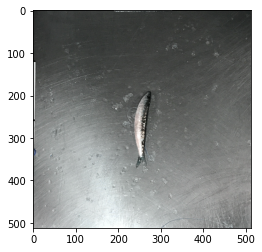

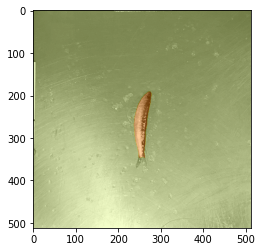

working on file: 	 //gdrive/My Drive/software/Unet_Pytorch/Data//sardines/sardina_test/IMG_3494.jpg
saving to : 	 ///gdrive/My Drive/software/Unet_Pytorch/Data//sardines/experiment_final2/output/IMG_3494_shape2.png


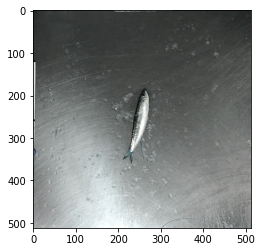

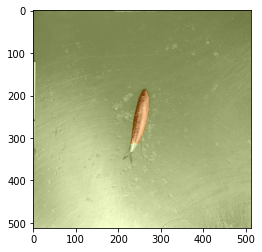

working on file: 	 //gdrive/My Drive/software/Unet_Pytorch/Data//sardines/sardina_test/IMG_3517.jpg
saving to : 	 ///gdrive/My Drive/software/Unet_Pytorch/Data//sardines/experiment_final2/output/IMG_3517_shape2.png


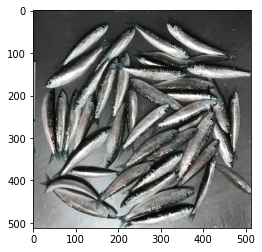

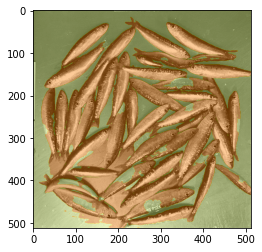

working on file: 	 //gdrive/My Drive/software/Unet_Pytorch/Data//sardines/sardina_test/IMG_4361.jpg
saving to : 	 ///gdrive/My Drive/software/Unet_Pytorch/Data//sardines/experiment_final2/output/IMG_4361_shape2.png


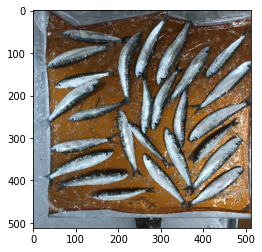

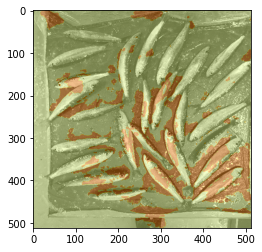

working on file: 	 //gdrive/My Drive/software/Unet_Pytorch/Data//sardines/sardina_test/IMG_4364.jpg
saving to : 	 ///gdrive/My Drive/software/Unet_Pytorch/Data//sardines/experiment_final2/output/IMG_4364_shape2.png


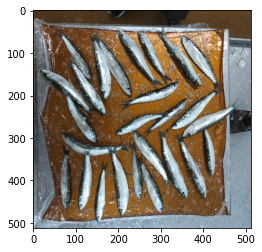

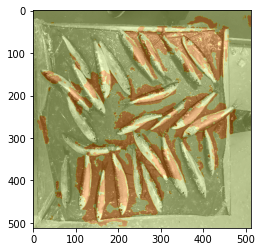

In [ ]:
for fname in files:
  fname = fname.strip()
  newfname_class = "%s/%s_shape2.png" % (OUTPUT_DIR, os.path.basename(fname)[0:os.path.basename(fname).rfind(".")])
  newfname_class2 = "%s/%s_shape_class2.png" % (OUTPUT_DIR, os.path.basename(fname)[0:os.path.basename(fname).rfind(".")])
  print(f"working on file: \t {fname}")
  print(f"saving to : \t {newfname_class}")


  cv2.imwrite(newfname_class, np.zeros(shape=(1, 1)))


  #io = cv2.cvtColor(cv2.imread(fname),cv2.COLOR_BGR2RGB)
  io = cv2.imread(fname)
  interpolation = cv2.INTER_LANCZOS4 
  io = cv2.resize(io, (resize[0], resize[1]), interpolation=cv2.INTER_LANCZOS4)
  io_shape_orig = np.array(io.shape)



  #add half the stride as padding around the image, so that we can crop it away later
  io = np.pad(io, [(stride_size//2, stride_size//2), (stride_size//2, stride_size//2), (0, 0)], mode="reflect")
  io_shape_wpad = np.array(io.shape)

  #pad to match an exact multiple of unet patch size, otherwise last row/column are lost
  npad0 = int(np.ceil(io_shape_wpad[0] / patch_size) * patch_size - io_shape_wpad[0])
  npad1 = int(np.ceil(io_shape_wpad[1] / patch_size) * patch_size - io_shape_wpad[1])
  io = np.pad(io, [(0, npad0), (0, npad1), (0, 0)], mode="constant")


  arr_out = sklearn.feature_extraction.image.extract_patches(io,(patch_size,patch_size,3),stride_size)
  arr_out_shape = arr_out.shape
  arr_out = arr_out.reshape(-1,patch_size,patch_size,3)

  #in case we have a large network, lets cut the list of tiles into batches


  # def divide_batch(l, n): 
  #     for i in range(0, l.shape[0], n):  
  #         yield l[i:i + n,::]

  #d=divide_batch(arr_out,batch_size)

  output = np.zeros((0,checkpoint["n_classes"],patch_size,patch_size))

  #for batch_arr in divide_batch(arr_out,batch_size):
  #   d=batch_arr
    #  e=d.transpose(0, 3, 1, 2)
      
  f = torch.from_numpy(arr_out.transpose(0, 3, 1, 2) / 255).type('torch.FloatTensor').to(device)


  f_PIL = tensor2pil(f[0,:,:,:])

      
      #arr_out_gpu = torch.from_numpy(batch_arr.transpose(0, 3, 1, 2) / 255).type('torch.FloatTensor').to(device)

      # ---- get results

      #output_batch = model(arr_out_gpu)
  output_batch = model(f)

  output_0_PIL = tensor2pil(output_batch[0,0,:,:])
  output_1_PIL = tensor2pil(output_batch[0,1,:,:])



  output_1_PIL_t = tensor2pil(output_batch[0,1,:,:].gt(0.4).type('torch.FloatTensor'))
  output_1_PIL_t.show()


      # --- pull from GPU
  output_batch = output_batch.detach().cpu().numpy()
      
      
      
  output = np.append(output,output_batch,axis=0)


  output = output.transpose((0, 2, 3, 1))

  #turn from a single list into a matrix of tiles
  output = output.reshape(arr_out_shape[0],arr_out_shape[1],patch_size,patch_size,output.shape[3])

  #remove the padding from each tile, we only keep the center
  #output=output[:,:,stride_size//2:-stride_size//2,stride_size//2:-stride_size//2,:]

  #turn all the tiles into an image
  output=np.concatenate(np.concatenate(output,1),1)

  #incase there was extra padding to get a multiple of patch size, remove that as well
  #output = output[0:io_shape_orig[0], 0:io_shape_orig[1], :] #remove paddind, crop back

  plt.imshow(np.moveaxis(f.detach().squeeze().cpu().numpy(),0,-1))
  plt.show()
    
  im_2 = color.rgb2gray(np.moveaxis(f.detach().squeeze().cpu().numpy(),0,-1))
  plt.imshow(im_2,cmap='gray')
  treshold=0.4
  plt.imshow(np.where(output[:,:,1]>treshold,1,0), cmap = 'Wistia', alpha = 0.4)


  # --- save output

  cv2.imwrite(newfname_class2, (output.argmax(axis=2) * (256 / (output.shape[-1] - 1) - 1)).astype(np.uint8))

  cv2.imwrite(newfname_class2, output.argmax(axis=2) * (256 / (output.shape[-1] - 1) - 1))
  
  fig1 = plt.gcf()
  plt.show()
  #plt.imsave(str(ii),(np.where(output[:,:,1]>treshold,1,0), cmap = 'Wistia', alpha = 0.4))
  fig1.savefig(newfname_class,dpi=500)

  o = (output.argmax(axis=2) * (256 / (output.shape[-1] - 1) - 1)).astype(np.uint8)

  #plt.show(output.argmax(axis=2))


  #output2 = output[:,:,1]

  #cv2.imwrite(newfname_class, (output2[output2>0.8]) * 256)

In [ ]:
"""
# ------ work on files 
for fname in files:

    fname = fname.strip()
    newfname_class = "%s/%s_class.png" % (OUTPUT_DIR, os.path.basename(fname)[0:os.path.basename(fname).rfind(".")])

    print(f"working on file: \t {fname}")
    print(f"saving to : \t {newfname_class}")

    if not args.force and os.path.exists(newfname_class):
        print("Skipping as output file exists")
        continue

    cv2.imwrite(newfname_class, np.zeros(shape=(1, 1)))

    
    io = cv2.cvtColor(cv2.imread(fname),cv2.COLOR_BGR2RGB)
    io = cv2.resize(io, (0, 0), fx=args.resize, fy=args.resize)

    io_shape_orig = np.array(io.shape)
    
    #add half the stride as padding around the image, so that we can crop it away later
    io = np.pad(io, [(stride_size//2, stride_size//2), (stride_size//2, stride_size//2), (0, 0)], mode="reflect")
    
    io_shape_wpad = np.array(io.shape)
    
    #pad to match an exact multiple of unet patch size, otherwise last row/column are lost
    npad0 = int(np.ceil(io_shape_wpad[0] / patch_size) * patch_size - io_shape_wpad[0])
    npad1 = int(np.ceil(io_shape_wpad[1] / patch_size) * patch_size - io_shape_wpad[1])

    io = np.pad(io, [(0, npad0), (0, npad1), (0, 0)], mode="constant")

    arr_out = sklearn.feature_extraction.image.extract_patches(io,(patch_size,patch_size,3),stride_size)
    arr_out_shape = arr_out.shape
    arr_out = arr_out.reshape(-1,patch_size,patch_size,3)

    #in case we have a large network, lets cut the list of tiles into batches
    output = np.zeros((0,checkpoint["n_classes"],patch_size,patch_size))
    for batch_arr in divide_batch(arr_out,batch_size):
        
        arr_out_gpu = torch.from_numpy(batch_arr.transpose(0, 3, 1, 2) / 255).type('torch.FloatTensor').to(device)

        # ---- get results
        output_batch = model(arr_out_gpu)

        # --- pull from GPU and append to rest of output 
        output_batch = output_batch.detach().cpu().numpy()
        
        output = np.append(output,output_batch,axis=0)


    output = output.transpose((0, 2, 3, 1))
    
    #turn from a single list into a matrix of tiles
    output = output.reshape(arr_out_shape[0],arr_out_shape[1],patch_size,patch_size,output.shape[3])

    #remove the padding from each tile, we only keep the center
    output=output[:,:,stride_size//2:-stride_size//2,stride_size//2:-stride_size//2,:]

    #turn all the tiles into an image
    output=np.concatenate(np.concatenate(output,1),1)
    
    #incase there was extra padding to get a multiple of patch size, remove that as well
    output = output[0:io_shape_orig[0], 0:io_shape_orig[1], :] #remove paddind, crop back

    # --- save output
    treshold=0.4
    # cv2.imwrite(newfname_class, (output.argmax(axis=2) * (256 / (output.shape[-1] - 1) - 1)).astype(np.uint8))
    cv2.imwrite(newfname_class, np.where(output[:,:,1]>treshold,1,0) * (256 / (output.shape[-1] - 1) - 1))
"""

'\n# ------ work on files \nfor fname in files:\n\n    fname = fname.strip()\n    newfname_class = "%s/%s_class.png" % (OUTPUT_DIR, os.path.basename(fname)[0:os.path.basename(fname).rfind(".")])\n\n    print(f"working on file: \t {fname}")\n    print(f"saving to : \t {newfname_class}")\n\n    if not args.force and os.path.exists(newfname_class):\n        print("Skipping as output file exists")\n        continue\n\n    cv2.imwrite(newfname_class, np.zeros(shape=(1, 1)))\n\n    \n    io = cv2.cvtColor(cv2.imread(fname),cv2.COLOR_BGR2RGB)\n    io = cv2.resize(io, (0, 0), fx=args.resize, fy=args.resize)\n\n    io_shape_orig = np.array(io.shape)\n    \n    #add half the stride as padding around the image, so that we can crop it away later\n    io = np.pad(io, [(stride_size//2, stride_size//2), (stride_size//2, stride_size//2), (0, 0)], mode="reflect")\n    \n    io_shape_wpad = np.array(io.shape)\n    \n    #pad to match an exact multiple of unet patch size, otherwise last row/column are lo